In [5]:
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd

colors = ['#9ACBCB', '#2F2F31', '#FFF39D', '#3296FF', '#F5A445', '#B8A7D6'][::-1]

In [6]:
input_csv = '../../data/mock/adhoc_analysis_tool1.csv'
df = pd.read_csv(input_csv)
df.head()

,Service Name,Cost Category,Amount
0,Accounts Payable,Employee Costs,23940133
1,Accounts Receivable,Employee Costs,12104939
2,Asset Management,Employee Costs,2271763
3,Budgeting,Employee Costs,39984021
4,Contract Management & Procurement,Employee Costs,33815784


In [7]:
df = df.pivot(index='Service name', columns='Cost category', values='Amount')
df

Cost Category,Consultants,Contractor Costs,Employee Costs,Overheads,Supplier Costs
Service Name,,,,,
Accounts Payable,308040,3310668,23940133,47343,7250384
Accounts Receivable,156929,1344994,12104939,36112,3939171
Asset Management,248687,367285,2271763,13846,1425375
Budgeting,890317,2273966,39984021,46759,5758652
Contract Management & Procurement,609442,2122017,33815784,20850,6767497
Credit Card Management,12931,203607,5276493,9442,1159005
Financial Policy & Advice,451039,780882,16308834,8488,2276730
Financial Reporting,767970,2650289,35971554,56216,8622329
Ledger Management,155868,895562,12913612,28736,2689883


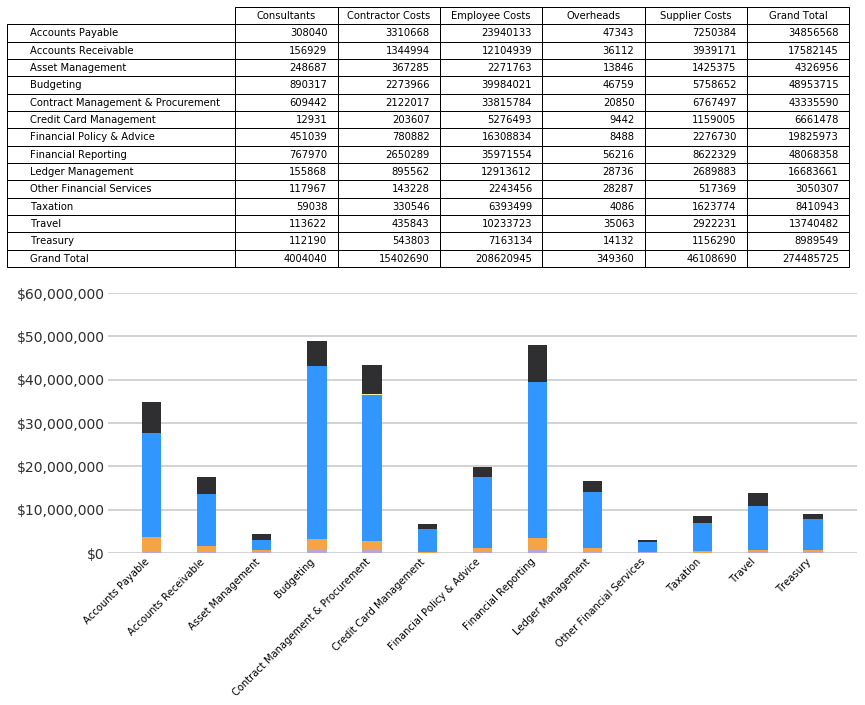

In [8]:
# Initialize figure and axes
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12,6)

service_names = df.index
color_map = {x:colors[i] for i,x in enumerate(df.columns)}
cumulative_points = []
for colname in df.columns:
    points = df[colname].values
    if cumulative_points:
        bottom = [sum(i) for i in zip(*cumulative_points)]
        ax.bar(range(len(service_names)), points, bottom=bottom, label=colname, width=0.35, zorder=2, color=color_map[colname])
    else:
        ax.bar(range(len(service_names)), points, width=0.35, label=colname, zorder=2, color=color_map[colname])
    cumulative_points.append(points)

#ax.set_ylabel('Total Cost', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.grid(color='lightgray', linewidth=2)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,pos: '${:,.0f}'.format(x)))
ax.tick_params(axis='y', which='major', labelsize=14, labelcolor='#2F2F31', length=0)
ax.tick_params(axis='x', which='major', length=0)
ax.set_xticks(range(len(service_names)))
labels = ax.set_xticklabels(service_names, rotation=45)
for label in labels:
    label.set_horizontalalignment('right')
ax.set_ylim(0,60000000)

df['Grand Total'] = df.apply(lambda x: x.values.sum(), axis=1)
df.loc['Grand Total'] = [df[col].sum() for col in df.columns]
the_table = ax.table(
    cellText=df.as_matrix(),
    rowLabels=df.index,
    colLabels=df.columns,
    bbox=[0.17, 1.1, 0.82, 1],
    loc='top')

fig.tight_layout()

# Write to a file
fig.savefig('../../reports/figures/mock/adhoc_analysis_tool1.pdf', bbox_inches='tight')